## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
sb.set()

In [2]:
data = pd.read_csv('Raw Data.csv')
data

,f (mm/min),d (µm),US vibration,C. Fluid,Fz mean (N),Ra mean (µm)
0,10,20,Off,Off,1.8460,1.8136
1,10,40,Off,Off,2.8410,1.5896
2,10,60,Off,Off,2.9837,1.5391
3,10,80,Off,Off,2.9863,1.1962
4,10,100,Off,Off,2.6037,1.1623
...,...,...,...,...,...,...
95,100,20,On,On,6.4340,2.1815
96,100,40,On,On,9.8447,1.9804
97,100,60,On,On,9.0963,1.4831
98,100,80,On,On,7.4290,1.3553


In [3]:
data.columns

Index(['f (mm/min)', 'd (µm)', 'US vibration', 'C. Fluid', 'Fz mean (N)',
       'Ra mean (µm)'],
      dtype='object')

In [4]:
data.columns = ['feed_rate', 'depth_of_cut', 'ultrasonic_vibration', 'cutting_fluid', 'cutting_force', 'surface_roughness']
data.columns

Index(['feed_rate', 'depth_of_cut', 'ultrasonic_vibration', 'cutting_fluid',
       'cutting_force', 'surface_roughness'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   feed_rate             100 non-null    int64  
 1   depth_of_cut          100 non-null    int64  
 2   ultrasonic_vibration  100 non-null    object 
 3   cutting_fluid         100 non-null    object 
 4   cutting_force         100 non-null    float64
 5   surface_roughness     100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [6]:
data['feed_rate'] = data['feed_rate'].astype('float')
data['depth_of_cut'] = data['depth_of_cut'].astype('float')

In [7]:
data.dtypes

feed_rate               float64
depth_of_cut            float64
ultrasonic_vibration     object
cutting_fluid            object
cutting_force           float64
surface_roughness       float64
dtype: object

In [8]:
data['ultrasonic_vibration'] = data['ultrasonic_vibration'].apply(lambda x:1 if 'On' in x else 0)
data['cutting_fluid'] = data['cutting_fluid'].apply(lambda x:1 if 'On' in x else 0)

In [9]:
data.head()

,feed_rate,depth_of_cut,ultrasonic_vibration,cutting_fluid,cutting_force,surface_roughness
0,10.0,20.0,0,0,1.8460,1.8136
1,10.0,40.0,0,0,2.8410,1.5896
2,10.0,60.0,0,0,2.9837,1.5391
3,10.0,80.0,0,0,2.9863,1.1962
4,10.0,100.0,0,0,2.6037,1.1623


In [10]:
data['ultrasonic_vibration'].value_counts()

0    50
1    50
Name: ultrasonic_vibration, dtype: int64

In [11]:
data['cutting_fluid'].value_counts()

0    50
1    50
Name: cutting_fluid, dtype: int64

## Exploratoty Data Analysis

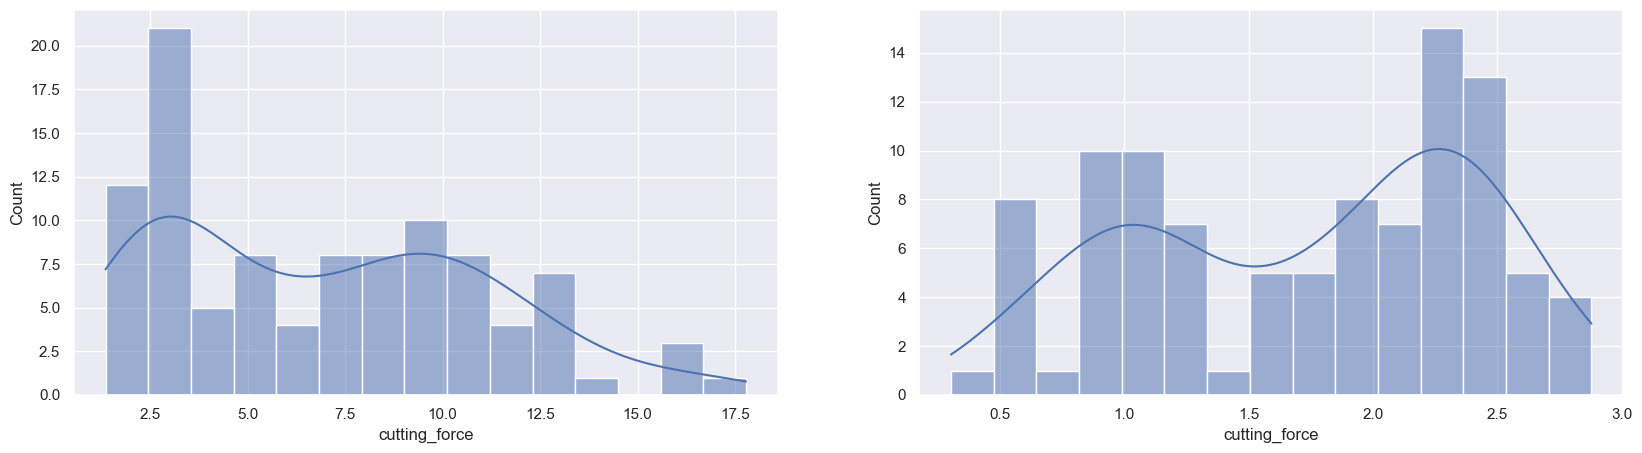

In [12]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.histplot(data['cutting_force'], bins=15, kde=True)

plt.subplot(1,2,2)
sb.histplot(np.log(data['cutting_force']), bins=15, kde=True);

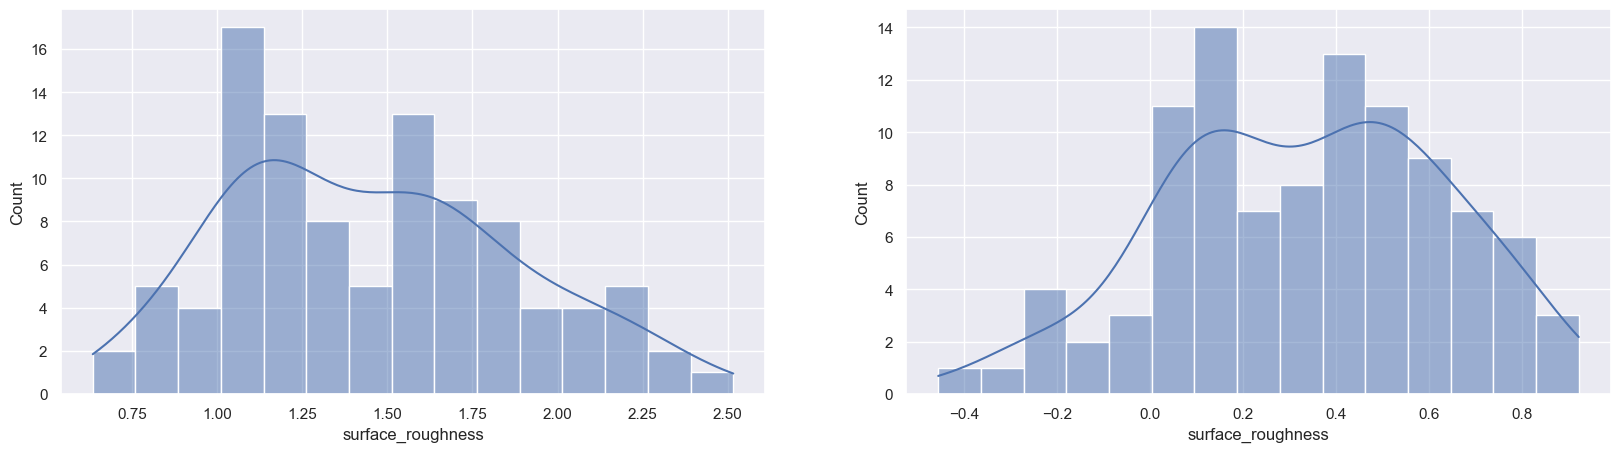

In [13]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.histplot(data['surface_roughness'], bins=15, kde=True)

plt.subplot(1,2,2)
sb.histplot(np.log(data['surface_roughness']), bins=15, kde=True);

The output variables will be on logarithmic scale to have normal distribution 

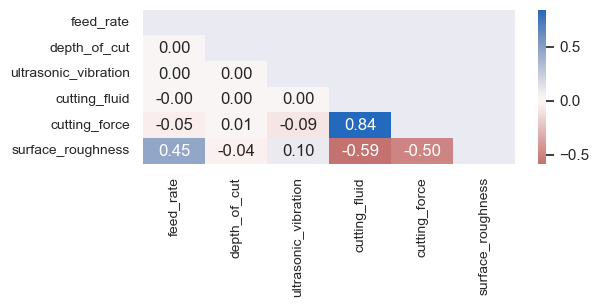

In [14]:
numeric_vars = ['feed_rate', 'depth_of_cut', 'ultrasonic_vibration', 'cutting_fluid', 'cutting_force', 'surface_roughness']

plt.figure(figsize = [6, 2])
corr_matrix = data[numeric_vars].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_matrix, mask=mask, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Only cutting fluid is correlated with cutting force and surface roughness, so we had to sub divide the data according to the boolean variables unltrasonic vibration and cutting fluid.

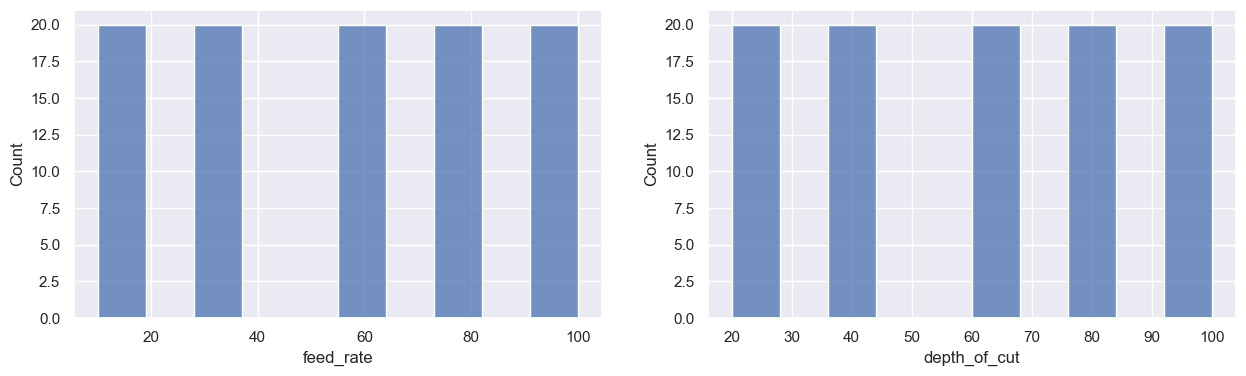

In [15]:
plt.figure(figsize = [15, 4])
plt.subplot(1,2,1)
sb.histplot(data['feed_rate'], bins=10)

plt.subplot(1,2,2)
sb.histplot(data['depth_of_cut'], bins=10);

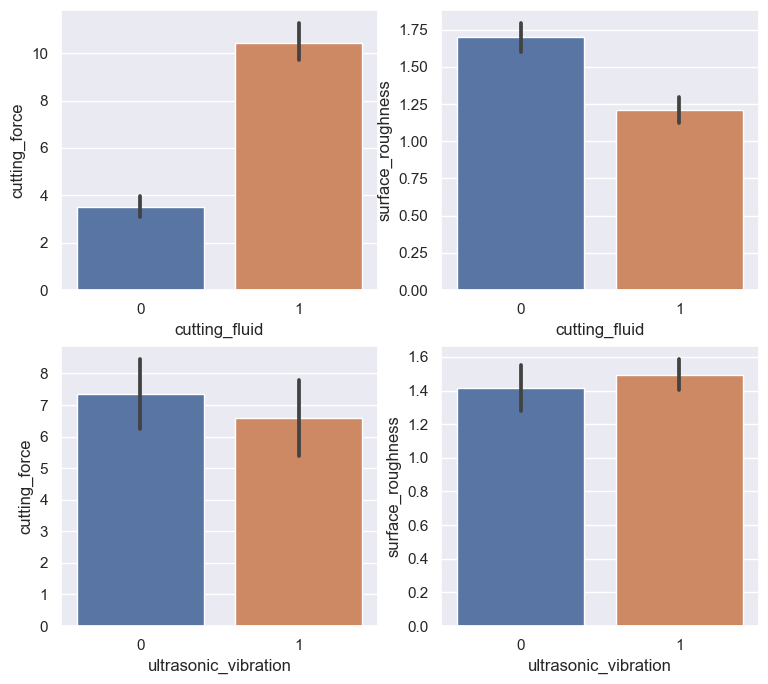

In [16]:
plt.figure(figsize = [9, 8])

plt.subplot(2,2,1)
sb.barplot(x=data['cutting_fluid'], y=data['cutting_force'])

plt.subplot(2,2,2)
sb.barplot(x=data['cutting_fluid'], y=data['surface_roughness'])

plt.subplot(2,2,3)
sb.barplot(x=data['ultrasonic_vibration'], y=data['cutting_force'])

plt.subplot(2,2,4)
sb.barplot(x=data['ultrasonic_vibration'], y=data['surface_roughness']);

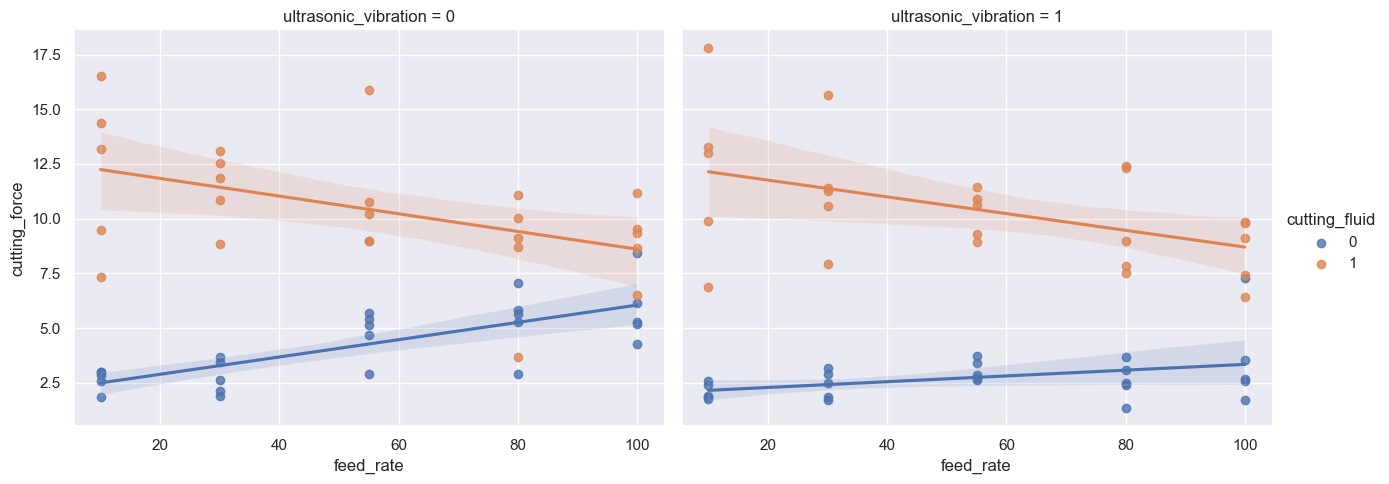

In [17]:
sb.lmplot(data=data, x='feed_rate', y='cutting_force', hue='cutting_fluid', col='ultrasonic_vibration', height=5, aspect=1.3);

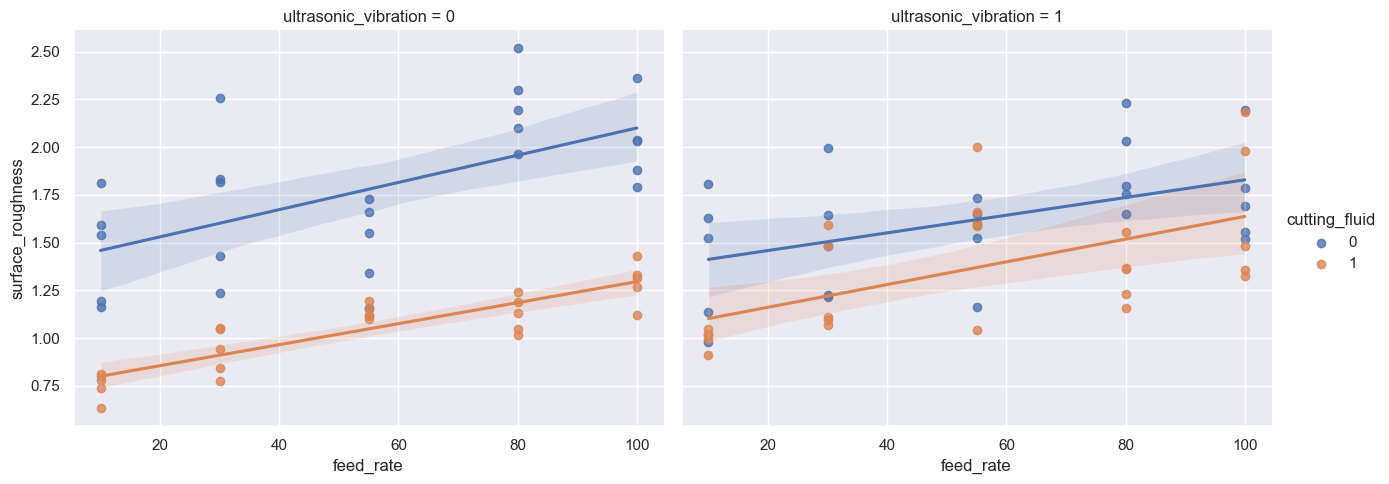

In [18]:
sb.lmplot(data=data, x='feed_rate', y='surface_roughness', hue='cutting_fluid', col='ultrasonic_vibration', height=5, aspect=1.3);

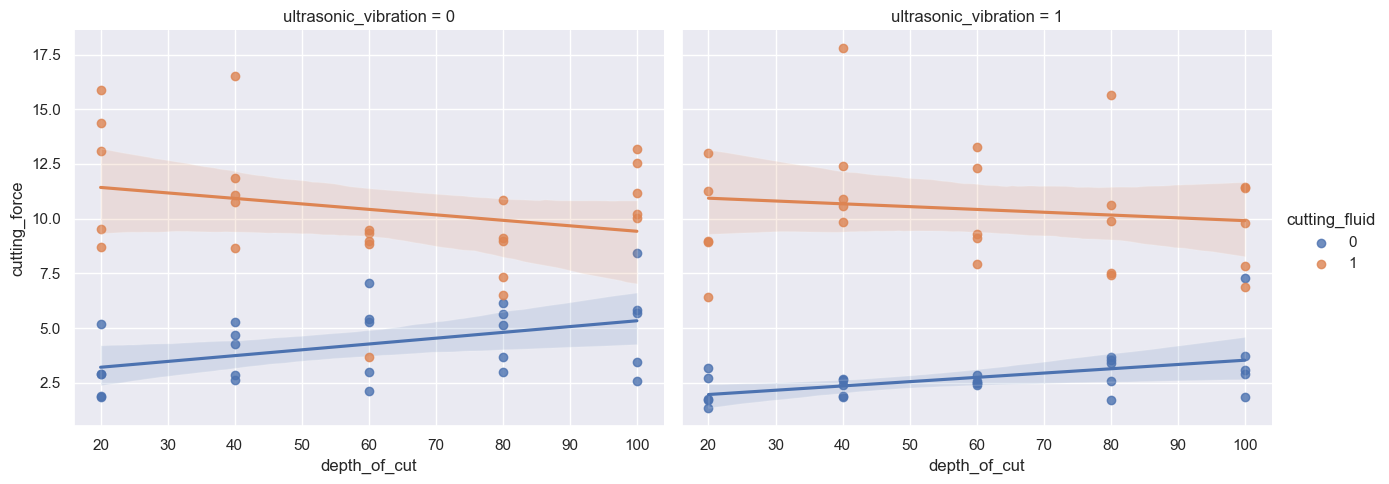

In [19]:
sb.lmplot(data=data, x='depth_of_cut', y='cutting_force', hue='cutting_fluid', col='ultrasonic_vibration', height=5, aspect=1.3);

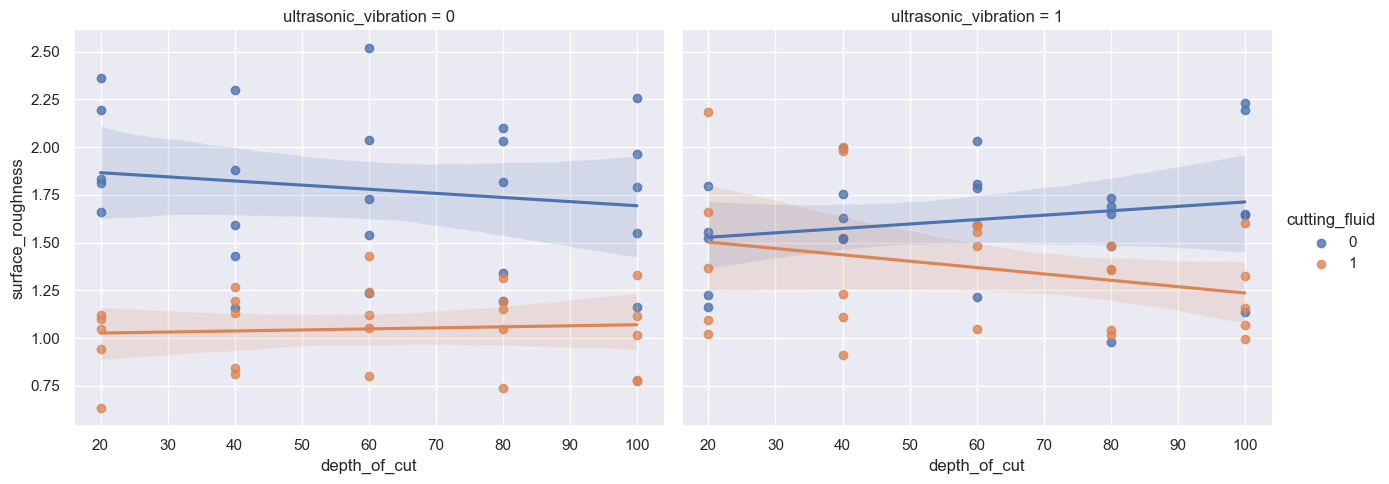

In [20]:
sb.lmplot(data=data, x='depth_of_cut', y='surface_roughness', hue='cutting_fluid', col='ultrasonic_vibration', height=5, aspect=1.3);

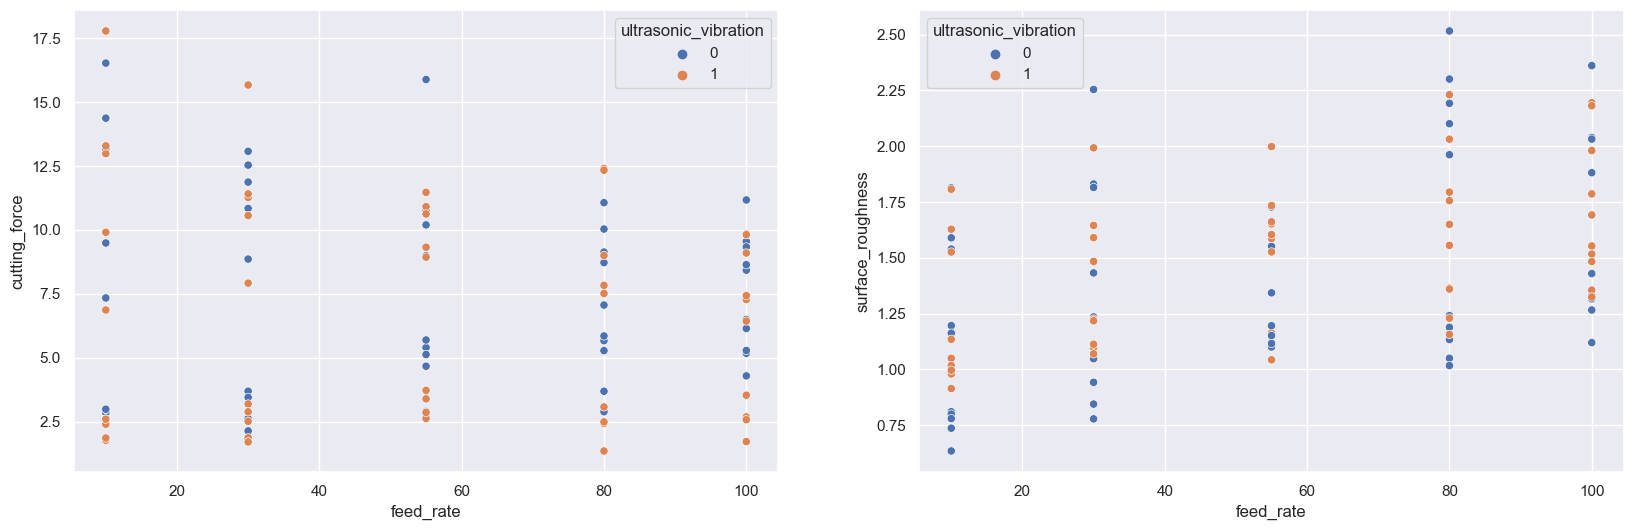

In [21]:
plt.figure(figsize = [20, 6])
plt.subplot(1,2,1)
sb.scatterplot(data=data, x='feed_rate', y='cutting_force', hue='ultrasonic_vibration')

plt.subplot(1,2,2)
sb.scatterplot(data=data, x='feed_rate', y='surface_roughness', hue='ultrasonic_vibration');

After subdividing the data according to the boolean variables, there is a correlation between numerical variables (feed rate and depth of cut) and output variables when subdividing the cutting fluid boolean variable. In contrast, there is no clear correlation when subdividing the untrasonic vibration boolean variable. so, untrasonic vibration has no great effect on output variables.

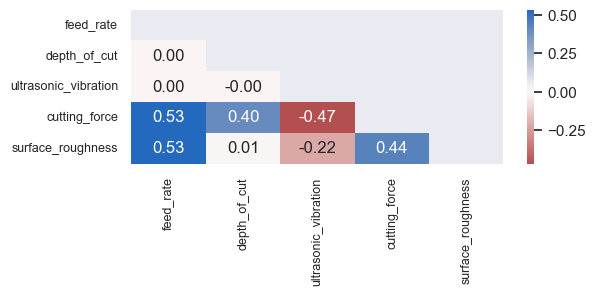

In [22]:
data_cf0 = data[data['cutting_fluid'] == 0]
numeric_vars = ['feed_rate', 'depth_of_cut', 'ultrasonic_vibration', 'cutting_force', 'surface_roughness']

plt.figure(figsize = [6, 2])
corr_matrix = data_cf0[numeric_vars].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_matrix, mask=mask, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

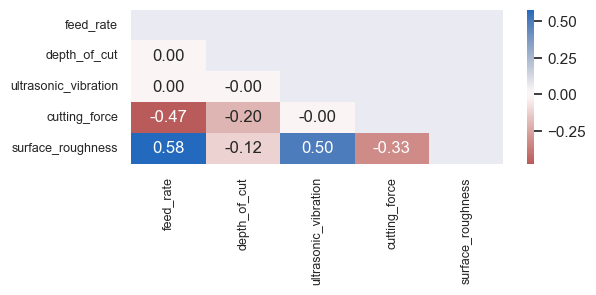

In [23]:
data_cf1 = data[data['cutting_fluid'] == 1]
numeric_vars = ['feed_rate', 'depth_of_cut', 'ultrasonic_vibration', 'cutting_force', 'surface_roughness']

plt.figure(figsize = [6, 2])
corr_matrix = data_cf1[numeric_vars].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_matrix, mask=mask, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

## Splitting the data into train and test sets

In [24]:
columns_to_drop = ['cutting_force', 'surface_roughness']
targets = np.log(data[['cutting_force', 'surface_roughness']])
inputs = data.drop(columns_to_drop, axis=1)
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [25]:
x_test

,feed_rate,depth_of_cut,ultrasonic_vibration,cutting_fluid
80,30.0,20.0,1,1
84,30.0,100.0,1,1
33,30.0,80.0,1,0
81,30.0,40.0,1,1
93,80.0,80.0,1,1
17,80.0,60.0,0,0
36,55.0,40.0,1,0
82,30.0,60.0,1,1
69,80.0,100.0,0,1
65,80.0,20.0,0,1


In [26]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')